Exercicio nº 3

CREMILDO RIBA GOUVEIA DIAS

•Take 1000 random samples with replacement of increasing sample sizes (e.g. 10, 50, 100, 150, 200, 250,
300, 500 and 1000 observations), compute the mean Temp_ann of each sample and use an appropriate
visualization to show how many samples will we need to have a good estimate of the population mean
(this is a corrected version of the last challenge of the previous).

•Using an appropriate visualization , check the effect of Mean Annual Temperature (Temp_ann) on the
presence of Salmo trutta fario (Brown Trout).

•Test, using both visualization and hypothesis testing methods, if the actual_river_slope is drawn from a
normal distribution.

•Take 100 samples of 2000 observations with replacement, compute the mean for each sample and plot
the resulting histogram of means. Test if these 100 mean values are drawn from a normal distribution.

In [28]:
# Importar pacotes
import pandas as pd
import zipfile
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots

In [29]:
# Importar ficheiro
df = pd.read_csv("D:\\avdac\greends-avcd\people\cremildo\EFIplus_medit.zip",compression="zip", sep=";")

In [3]:
print(df)

       Site_code   Latitude  Longitude   Country Catchment_name  Galiza  \
0     ES_01_0002  38.102003  -4.096070     Spain   Guadalquivir       0   
1     ES_02_0001  40.530188  -1.887796     Spain           Tejo       0   
2     ES_02_0002  40.595432  -1.928079     Spain           Tejo       0   
3     ES_02_0003  40.656184  -1.989831     Spain           Tejo       0   
4     ES_02_0004  40.676402  -2.036274     Spain           Tejo       0   
...          ...        ...        ...       ...            ...     ...   
5006      PTVO60  40.641612  -8.325149  Portugal          Vouga       0   
5007      PTVO61  40.729015  -8.098851  Portugal          Vouga       0   
5008      PTVO62  40.727959  -8.107344  Portugal          Vouga       0   
5009      PTVO63  40.817783  -8.224903  Portugal          Vouga       0   
5010      PTVO64  40.794352  -8.255380  Portugal          Vouga       0   

      Subsample  Calib_EFI_Medit  Calib_connect  Calib_hydrol  ...  \
0             1              

In [4]:
df.head(5)

,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
0,ES_01_0002,38.102003,-4.096070,Spain,Guadalquivir,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,ES_02_0001,40.530188,-1.887796,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ES_02_0002,40.595432,-1.928079,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,ES_02_0003,40.656184,-1.989831,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,ES_02_0004,40.676402,-2.036274,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Columns: 164 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(38), int64(120), object(6)
memory usage: 6.3+ MB


In [6]:
list(df.columns)

['Site_code',
 'Latitude',
 'Longitude',
 'Country',
 'Catchment_name',
 'Galiza',
 'Subsample',
 'Calib_EFI_Medit',
 'Calib_connect',
 'Calib_hydrol',
 'Calib_morphol',
 'Calib_wqual',
 'Geomorph1',
 'Geomorph2',
 'Geomorph3',
 'Water_source_type',
 'Flow_regime',
 'Altitude',
 'Geological_typology',
 'Actual_river_slope',
 'Natural_sediment',
 'Elevation_mean_catch',
 'prec_ann_catch',
 'temp_ann',
 'temp_jan',
 'temp_jul',
 'Barriers_catchment_down',
 'Barriers_river_segment_up',
 'Barriers_river_segment_down',
 'Barriers_number_river_segment_up',
 'Barriers_number_river_segment_down',
 'Barriers_distance_river_segment_up',
 'Barriers_distance_river_segment_down',
 'Impoundment',
 'Hydropeaking',
 'Water_abstraction',
 'Hydro_mod',
 'Temperature_impact',
 'Velocity_increase',
 'Reservoir_flushing',
 'Sedimentation',
 'Channelisation',
 'Cross_sec',
 'Instream_habitat',
 'Riparian_vegetation',
 'Embankment',
 'Floodprotection',
 'Floodplain',
 'Toxic_substances',
 'Acidification',
 '

In [7]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df.drop(df.iloc[:,5:15], axis=1, inplace=True)

# let's rename some columns so that they make sense
df.rename(columns={'Sum of Run1_number_all':'Total_fish_individuals'}, inplace=True) # inplace="True" means that df will be updated

# for sake of consistency, let's also make all column labels of type string
df.columns = list(map(str, df.columns))

In [8]:
# Number of missing values (NaN) per variable
df.isnull().sum()

Site_code               0
Latitude                0
Longitude               0
Country                 0
Catchment_name          0
                       ..
Zingel asper            0
Squalius sp             0
Barbatula sp            0
Phoxinus sp             0
Iberochondrostoma_sp    0
Length: 154, dtype: int64

In [9]:
df2 = df.dropna(how='all') # drops rows when  all elements are missing values
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Columns: 154 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(35), int64(113), object(6)
memory usage: 5.9+ MB


In [10]:
df2 = df.dropna(how='all', axis=1) # drops columns when at least one element is a missing value
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Columns: 154 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(35), int64(113), object(6)
memory usage: 5.9+ MB


In [11]:
df2 = df.dropna() # drops rows when at least one element is a missing value
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2822 entries, 18 to 5010
Columns: 154 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(35), int64(113), object(6)
memory usage: 3.3+ MB


In [18]:
# Check data types
pd.options.display.max_rows = 154 # maximum number of rows displayed.
df2.dtypes

Site_code                                object
Latitude                                float64
Longitude                               float64
Country                                  object
Catchment_name                           object
Water_source_type                        object
Flow_regime                              object
Altitude                                  int64
Geological_typology                      object
Actual_river_slope                      float64
Natural_sediment                        float64
Elevation_mean_catch                    float64
prec_ann_catch                          float64
temp_ann                                float64
temp_jan                                float64
temp_jul                                float64
Barriers_catchment_down                   int64
Barriers_river_segment_up               float64
Barriers_river_segment_down             float64
Barriers_number_river_segment_up        float64
Barriers_number_river_segment_down      

Random samples

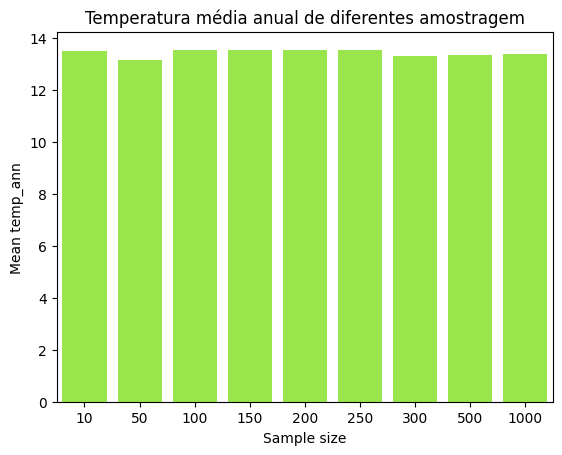

In [20]:
import numpy as np
sample_sizes = [10, 50, 100, 150, 200, 250, 300, 500, 1000]
means = []

for i in sample_sizes:
    sample = df2.sample(n=i)
    mean_temp_ann = np.mean(sample["temp_ann"])
    means.append(mean_temp_ann)

sns.barplot(x=np.array(sample_sizes), y=np.array(means), color = "#99FF33")

plt.xlabel("Sample size")
plt.ylabel("Mean temp_ann")
plt.title("Temperatura média anual de diferentes amostragem")

plt.show()

Criação da tabela

In [21]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np

salm_temp = pd.crosstab(df2["temp_ann"], df2["Salmo trutta fario"])
print(salm_temp)
len(salm_temp)


Salmo trutta fario   0   1
temp_ann                  
6.7                  0   1
6.9                  0   1
7.0                  0   1
7.1                  0   2
7.4                  0   2
7.6                  0   3
7.7                  0   1
7.9                  0   1
8.0                  0   4
8.1                  0   1
8.2                  0   2
8.3                  0   6
8.4                  0   4
8.5                  0   2
8.6                  0   5
8.7                  0   3
8.8                  0   5
8.9                  0   4
9.0                  0   7
9.1                  0   5
9.2                  0   4
9.3                  0   3
9.4                  0   8
9.5                  0   9
9.6                  0   6
9.7                  0   7
9.8                  0   8
9.9                  0  19
10.0                 0  14
10.1                 0  14
10.2                 0  14
10.3                 0   8
10.4                 2   9
10.5                 1  23
10.6                 0  18
1

104

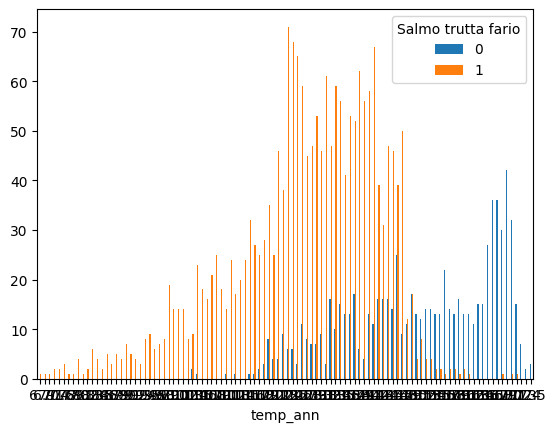

In [22]:
# Creating barplot from crosstable

# Creating barplot from crosstable
barplot = salm_temp.plot.bar(rot=0)
# A representação grafica não está boa. Para melhor visualizar eu deveria agrupar a temperatura em classes.

Teste de Normalidade
Normal Q-Q plots

((array([-3.48551809, -3.24072473, -3.10529582, ...,  3.10529582,
          3.24072473,  3.48551809]),
  array([  0.   ,   0.   ,   0.   , ..., 173.4  , 225.306, 774.   ])),
 (16.698112792857135, 15.35990077958894, 0.690478005049109))

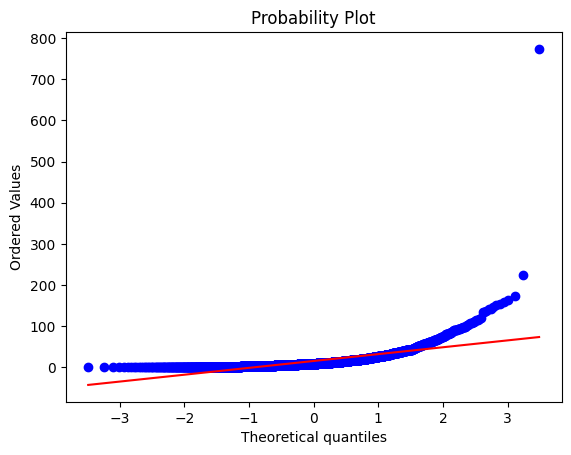

In [23]:
# QQ Plot
import scipy.stats as stats
import matplotlib.pyplot as plt

df2 = df2[["Actual_river_slope"]]
stats.probplot(df2["Actual_river_slope"], dist="norm", plot=plt)

In [25]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

df2 = df2[["Actual_river_slope"]]
# normality test
stat, p = shapiro(df2[["Actual_river_slope"]])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
 print('Sample looks Gaussian (fail to reject H0)')
else:
 print('Sample does not look Gaussian (reject H0)')

 #Statistics=0.480, p=0.000
 #Existe evidencias suficiente para se rejeitar a hipotese nula os dados de "Actual_river_slope" não segue uma distribuição normal.

Statistics=0.480, p=0.000
Sample does not look Gaussian (reject H0)


Take 100 samples of 2000 observations with replacement

In [26]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats 
import seaborn as sns

dat = np.random.choice(np.arange(0, 100), 2000, replace=True) 
print(f'μ={dat.mean()}')

μ=49.4715


Teste de distribuição normal

In [27]:
# import function
from scipy.stats import shapiro

# normality test
stat, p = shapiro(dat)
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs
# interpret. H0: 'the sample was drawn from a Gaussian distribution'.
alpha = 0.05
if p > alpha:
 print('Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)')
else:
 print('Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)')

 #Dado que p-value é menor que 0,05 de nivel de significancia, rejeira-se a hipotese nula, logo concluimos que a amostra não segue distribuição normal.

Statistics=0.952, p=0.000
Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)
